**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

#**PART 1**:  Gradient Descent with Simple Linear Regression
In this project, you will generate a Simple Linear Regression model using gradient descent to minimize the cost function of the sum of squared errors.  You will compare the coefficients computed directly for the model presented in the Linear Regression Project in a previous unit, then you will recalculate the coefficients using the gradient descent cost minimization technique.

Please reference the video lectures on Gradient Descent, and Simple Linear Regression for a description of this example and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  You will be turning in code and screenshots of your console output in an accompanying assignment.


-  **Step 1**:  
Calculate the coefficients for a simple linear regression model using the following equations:  (NOTE, you may NOT use any machine learning library models for this step - you must calculate the parameters use the equations shown).  
Normalize the dataset using the min and max of each of the variables (min/max of the X's and min/max of the y's), then use the equation shown to normalize each of the values in the columns:
          X_normalized = (X - Xmin)/(Xmax - Xmin)
          y_normalized = (y - ymin)/(ymax - ymin)
 The equations used to calculate the gradient are the partial derivatives of the cost function with respect to c0 and c1.  

$$\widehat y = c_0+c_1x_1$$  
$$c_1=\frac {\sum
(x_n-\bar x)(y_n-\bar y)} {\sum
(x_n-\bar x)^2} $$  
$$c_0=\bar y-c_1\bar x$$  

-  **Step 2**:  
Write a function that implements gradient descent from scratch (i.e. you may not call any library functions) to generate the linear regression equation coefficients by minimizing the cost function.
Here we use the Mean Square Error (MSE) cost function where n is the number of examples in the dataset, y is the dependent variable in the dataset, $c_0$ is the y-intercept for the linear equation, $c_1$ is the slope of the linear equation, and $x_1$ is the independent variable ($y = c_1x_1 + c_0$)

$$MSE = \frac{1}{n}\sum(y - \widehat y)^2 = \frac{1}{n}\sum(y - (c_0+c_1x_1))^2$$  

           API:  def gradientDescent(coeffs, X, y, μ, iterations):
           Input: coefficients: array of coefficients (i.e. c0 and c1) initialized to random values
                  X: normalized training dataset independent vars (see hint below)
                  y: normalized training dataset dependent vars (see hint below)
                  μ:  learning rate  
                  iterations: number of iterations to run
           Output: Returns c0_arr, c1_arr, MSE_arr (in this order), where c0_arr, c1_arr, MSE_arr are numpy arrays
                   of the c0, c1 coefficients and sum-of-squared error respectively for each of the iterations performed in your gradient descent loop.

$$\frac{\partial(MSE)}{\partial c_0} = \frac{1}{n}\cdot 2(y-(c_0+c_1x_1))\cdot -1 = -\frac{2}{n}(y-\widehat y) $$

 $$\frac{\partial(MSE)}{\partial c_1} = \frac{1}{n}\cdot 2(y-(c_0+c_1x_1))\cdot -X_1 = -\frac{2}{n}(y-\widehat y)x_1 $$
> Hint:  
 - The following calculations are done over each sample in the training set (i.e. use a for loop).
 - Calc the model prediction:  
    $\widehat y = c_0 + c_1X$
 - Calc the MSE:   
    $MSE = \frac{1}{n}\sum(y - \widehat y)^2$
 - Calc the gradient of c0:  
    $\frac{\partial(MSE)}{\partial c_0}=-\frac{2}{n}\sum(y-\widehat y)$
 - Calc the gradient of c1:  
    $\frac{\partial(MSE)}{\partial c_1}-\frac{2}{n}\sum(y-\widehat y)x_1$
 - Update the coefficients:  
    - c0 = c0 - μ(gradient of c0)  
    - Append calculated c0 to c0 array
    - c1 = c1 - μ(gradient of c1)  
    - Append calculated c1 to c1 array


- **Step 3**:  
Plot the equation of your model from the manual (Step 1) model and gradient descent (Step 2) model on the same graph along with your dataset points.  
Your plot should look something like this for random initial values of c0 and c1 and 50 iterations (note, it may not look exactly as the plot shown as it will be dependent on the initial random values of the coefficients).  The blue line in the graph is the equation with directly computed coefficients (Step 1), while the red line represents the coefficients calculated by minimizine the cost function with Gradient Descent (Step 2).  Also note that the plotted dataset has been normalized.

![alt text](https://docs.google.com/uc?export=download&id=1F5mxjjzqnuNC9mZNsJwXcHVDcN6TXKgw)


- **Step 4**:  
Experiment with different numbers of iterations to see how your gradient descent model changes compared to that of manual model.   You should observe an improvement with increased number of iterations such the two techniques converge with higher numbers of iterations. (i.e. the lines should coincide). Print out the the minimum number of iterations, values of your coefficients, and MSE for the line that visually is closest to the direct coefficients method (you should be able to find a number of iterations that basically overlays the two prediction lines). Note that we want to find a minimum number of iterations that also provides a minimized cost.


- **Step 5**:  
Plot on a 3D graph your coefficients (c0 and c1), on x and y axes respectively, and MSE (Sum of Square Errors) on the z-axis.  Your plot should should the MSE converging to a minimum as shown in the figure below.  Note your graph will not look exactly as the plot shown as it will be depending on the initial random values of the coefficients and the number of iterations.  

![alt text](https://docs.google.com/uc?export=download&id=1buL6OC40DMZJduCQIh66PDBOxYbRieN3)


- **Step 6**:  
Calculate the performance for both techniques (Step 2, Step 3) using the r-squared score metric.  
Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html  
Why does the R-square score for the direct calculated coefficients remain constant, and why is it relatively low?  
Why does the R-square score change from run to run for the gradient descent calculated coefficients?



ypred_direct: [0.51665138 0.28764924 0.32928599 0.50624219 0.66238002 0.6831984
 0.43337788 0.22519411 0.64156164 0.5895157  0.74565353 0.17314817
 0.53746976 0.43337788]
0.052871303774388874


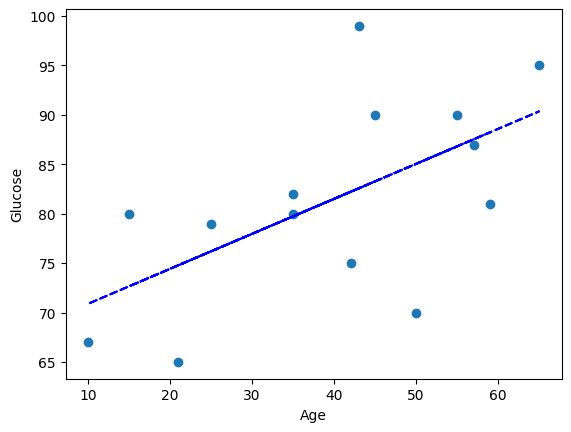

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from sklearn.metrics import r2_score


#Input Parameters
Age = np.array([43,21,25,42,57,59,35,15,55,50,65,10,45,35])
Glucose = np.array([99,65,79,75,87,81,80,80,90,70,95,67,90,82])


#Step 1:  Create a function which MANALLY (using the equations) calculates the
#         coefficients for a simple linear regression model, then plot the calculated
#         regression line on top of the dataset.
#         Your function must input numpy arrays for the x and y variables and return c0 and c1.
#         Your function MUST use equations shown in the text cell above.
#         Note - you may not use a machine learning library model for this step.
#         Note - you may (should) use the function you created in the Linear Prediction Project.
#         Note - normalize your data using the min/max method before calculating the coefficients.
X = Age
y = Glucose
#Normalize the data using the following min/max method:
#Normalized Sample = (Sample - Sample.min)/(Sample.max - Sample.min)
X_normalized = (X - X.min()) / (X.max() - X.min())
y_normalized = (y - y.min()) / (y.max() - y.min())
# YOUR CODE HERE...



#Write a function to calculate the Linear Regression coefficients manually.
#See the text cell notes for the equations
def simpleLRcoeffsManual(X, Y):
  xmean = np.mean(X)
  ymean = np.mean(Y)
  numeratorc1 = sum((Xi - xmean)*(Yi - ymean) for Xi, Yi in zip(X,Y))
  denominatorc1 = sum((Xi - xmean)**2 for Xi in X)
  coeff_c1 = numeratorc1 / denominatorc1
  coeff_c0 = ymean - coeff_c1 * xmean

  return coeff_c0,coeff_c1


#Call your function to generate the model coefficients
# YOUR CODE HERE...
c0_direct,c1_direct = simpleLRcoeffsManual(X_normalized, y_normalized)

#Generate the prediction outputs
ypred_direct = c0_direct + c1_direct * X_normalized
print('ypred_direct:', ypred_direct)

#Calculate the MSE
MSE_direct = np.mean((y_normalized - ypred_direct)**2)
print(MSE_direct)


c1_denorm = c1_direct * (y.max() - y.min()) / (X.max() - X.min())
c0_denorm = c0_direct * (y.max() - y.min()) + y.min() - c1_denorm * X.min()
ypred = c0_denorm + c1_denorm * X
MSE_manual = np.mean((y - ypred)**2)

#Plot the data and prediction line for the manual calculation
# YOUR CODE HERE...
plt.plot(X, y, 'o')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.plot(X, ypred, 'b--')

In [ ]:
#Step 2:  Write a function that implements gradient descent to minimize the cost function.
#         where the cost function is sum-of-square error (MSE)
#         Inputs:  coeffs:  array of coefficients c0 and c1 initialized to random values
#                  X:  dataset normalized independent variable values
#                  y:  dataset normalized dependent variable values
#                  lr: learning rate
#                  iterations:  number of iterations
#         Outputs: Returns c0_arr, c1_arr, MSE_arr (in this order)
#         def gradientDescent(coeffs, X, y, lr, iterations):
#
def gradientDescent(coeffs, X, y, lr, iterations):
# YOUR CODE HERE...

  #Init c0 and c1 to the input parameter coeffs
  c0 = coeffs[0]
  c1 = coeffs[1]

  #Create empty numpy arrays to hold coeffs and MSE over each iteration
  c1_arr = np.empty(iterations)
  c0_arr = np.empty(iterations)
  MSE_arr = np.empty(iterations)

  #Loop over the number of iterations
  for i in range(iterations):

    n = len(X)
    #Calculate yhat
    yhat = c0 + c1* X_normalized

    #Calculate MSE
    MSE = np.mean((y_normalized - yhat)**2)

    #Calculate gradients for the trainable parameters (coefficients c0, c1)
    grad_c0 = (-2/n)*sum(y_normalized - yhat)
    grad_c1 = (-2/n)* sum((y_normalized - yhat)* X_normalized)

    #Update the trainable parameters (coefficients c0, c1)
    c0 = c0 - lr * grad_c0
    c1 = c1 - lr * grad_c1

    #Append the coefficients and MSE to arrays (for plotting later)
    c0_arr[i] = c0
    c1_arr[i] = c1
    MSE_arr[i] = MSE

  return c0_arr, c1_arr, MSE_arr

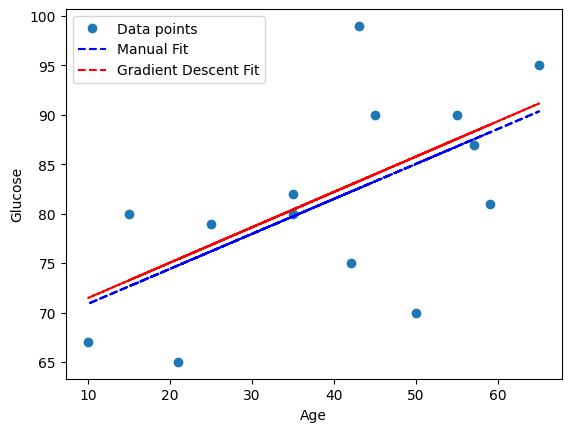

In [ ]:
# Step 3: Plot the equation of your model from the manual (Step 1) model and gradient descent (Step 2) model
#         on the same graph along with your dataset points.
#         Note, Use the normalized dataset.
#         Run your algorithm for 100 epochs
#         Set your learning rate (lr) to 0.01

epochs = 100                        #for test - do not change
initial_c = np.array([0.4, 0.7])    #for test - do not change
lr = 0.01                           #for test - do not change

# YOUR CODE HERE...

#Call the gradientDescent function
c0_arr, c1_arr, MSE_arr = gradientDescent(initial_c, X_normalized, y_normalized, lr, epochs)
c0,c1 = c0_arr[-1], c1_arr[-1]

#Calculate the predictions (ypred) using trained coefficients
#   Hint: use the last coefficients in the returned arrays

c1denorm = c1 * (y.max() - y.min()) / (X.max() - X.min())
c0denorm = c0 * (y.max() - y.min()) + y.min() - c1denorm * X.min()
ypredgd = c0denorm + c1denorm * X

#Graph the output on the same plot as the manual prediction
plt.plot(X, y, 'o', label='Data points')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.plot(X, ypred, 'b--', label='Manual Fit')
plt.plot(X, ypredgd, 'r--', label='Gradient Descent Fit')
plt.legend()

Min. number of iterations: 185
Coefficient 0: 67.46293641712361
Coefficient 1: 0.3529340846524874
MSE for gradient descent: 61.12527799400965


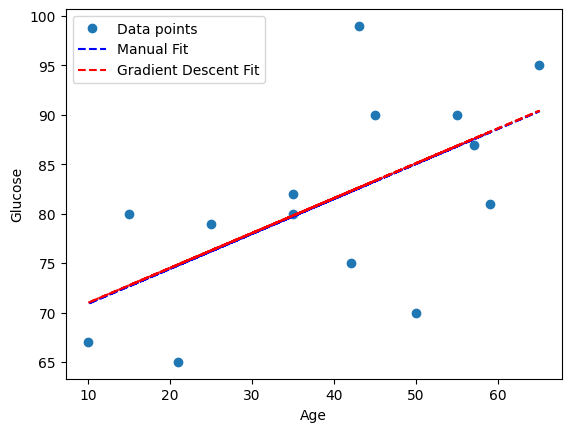

In [ ]:
# Step 4:  Experiment with different numbers of iterations to see how your gradient descent
#          model changes compared to that of manual model.   You should observe an improvement
#          with increased number of iterations such the two techniques converge with higher numbers
#          of iterations. (i.e. the lines should coincide). Print out the the minimum number of
#          iterations, values of your coefficients, and MSE for the line that visually is closest to the
#          direct coefficients method.
# YOUR CODE HERE...


epochs = 185
initial_c = np.array([0.4, 0.7])
lr = 0.01

#Call the gradientDescent function
c0_arr, c1_arr, MSE_arr = gradientDescent(initial_c, X_normalized, y_normalized, lr, epochs)
c0,c1 = c0_arr[-1], c1_arr[-1]

c1denorm = c1 * (y.max() - y.min()) / (X.max() - X.min())
c0denorm = c0 * (y.max() - y.min()) + y.min() - c1denorm * X.min()
ypredgd = c0denorm + c1denorm * X

plt.plot(X, y, 'o', label='Data points')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.plot(X, ypred, 'b--', label='Manual Fit')
plt.plot(X, ypredgd, 'r--', label='Gradient Descent Fit')
plt.legend()
mse_manual = np.mean((y - ypred)**2)
mse_gd = np.mean((y - ypredgd)**2)

print(f"Min. number of iterations: {epochs}")
print(f"Coefficient 0: {c0denorm}")
print(f"Coefficient 1: {c1denorm}")
print(f"MSE for gradient descent: {mse_gd}")

minZ, index: 0.052876794256224394 184


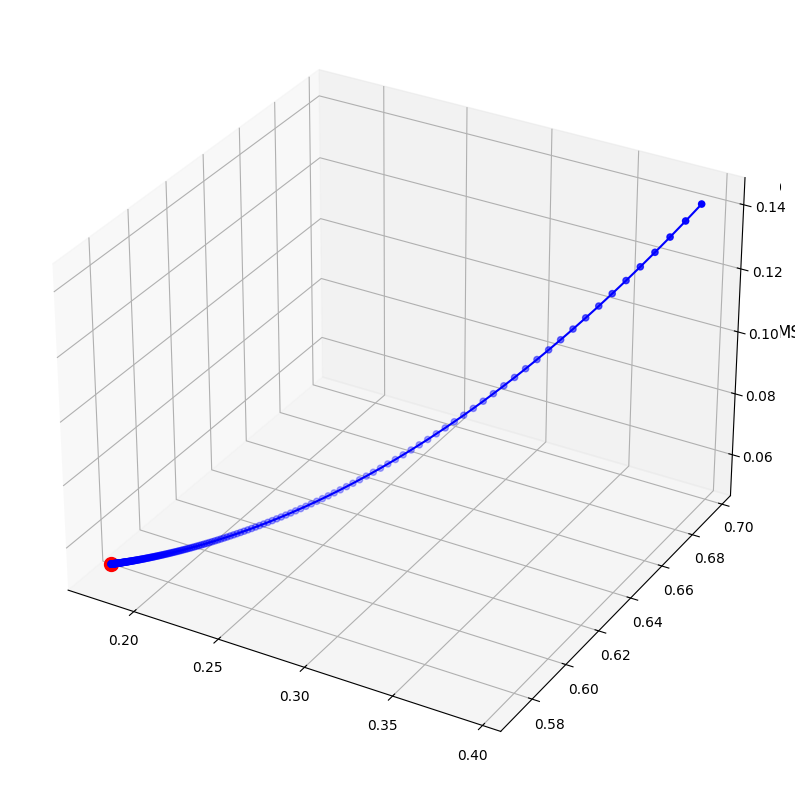

In [ ]:
# Step 5: Plot on a 3D graph your coefficients (c0 and c1), on x and y axes respectively,
#         and MSE (Sum of Square Errors) on the z-axis.  Your plot should should the
#         MSE converging to a minimum as shown in the figure below.  Note your graph will
#         not look exactly as the plot shown as it will be depending on the initial
#         random values of the coefficients and the number of iterations.
#         Hint: https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html
# YOUR CODE HERE...
# Note - The code below will generate a 3D plot
#        Use this or code your own plot routine

def gradientDescentArrayHistory(coeffs, X, y, lr, iterations):
# YOUR CODE HERE...
  c0 = coeffs[0]
  c1 = coeffs[1]
  c1_hist = np.empty(iterations)
  c0_hist = np.empty(iterations)
  MSE_hist = np.empty(iterations)
  for i in range(iterations):

    n = len(X)
    yhat = c0 + c1* X_normalized
    MSE = np.mean((y_normalized - yhat)**2)
    grad_c0 = (-2/n)*sum(y_normalized - yhat)
    grad_c1 = (-2/n)* sum((y_normalized - yhat)* X_normalized)
    c0 = c0 - lr * grad_c0
    c1 = c1 - lr * grad_c1
    c0_hist[i] = c0
    c1_hist[i] = c1
    MSE_hist[i] = MSE

  return c0_hist, c1_hist, MSE_hist

coef_c0, coef_c1, error = gradientDescentArrayHistory(initial_c, X_normalized, y_normalized, lr, epochs)
z2D = np.empty([epochs,epochs])
for m in range(0,epochs):
  z2D[m,:] = np.array(error[m]*np.ones((epochs)))

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('c0', fontsize=12, loc='right')
ax.set_ylabel('c1', fontsize=12, loc='bottom')
ax.set_zlabel('MSE', fontsize=12 )
ax1 = plt.axes(projection='3d')
ax1.scatter(coef_c0, coef_c1, error, c='b')
ax1.plot(coef_c0, coef_c1, error, color='b')

#Find the min value and index in the error array
minZ = error[0]
minZindex = 0
for n in range (0, epochs):
  if error[n] < minZ:
    minZ = error[n]
    minZindex = n
print('minZ, index:', minZ, minZindex)

#Highlight the last coefficents (should be the ones with the minimized cost)
ax1.scatter(coef_c0[epochs-1], coef_c1[epochs-1], error[epochs-1], color='r', s=100)
plt.show()

In [ ]:
#Step 6:  Calculate the performance for both techniques (Step 2, Step 3) using the r-squared score metric.
# YOUR CODE HERE...

#Why does the R-square score for the direct calculated coefficients remain constant, and why is it relatively low?
# It remains constant because the manual calculation uses a set formula, leading to the same results every time. The score is low because the correlation between
# age and glucose levels is weak, and more factors are needed to explain the variance in the data.

# Why does the R-square score change from run to run for the gradient descent calculated coefficients?
# The initial values are randomly selected causing different final coefficients to be output each time.


r2_score_direct = r2_score(y,ypred)
r2_score_gradDescent = r2_score(y,ypredgd)

print("Direct r2 score:",r2_score_direct)
print("gradient r2 score:",r2_score_gradDescent)

import doctest

'''
  >>> #Direct coefficients
  >>> print(np.round(ypred_direct[0], 3))
  0.517
  >>> print(np.round(ypred_direct[-1], 3))
  0.433
  >>> print(np.round(MSE_direct, 3))
  0.053
  >>> #Regression coeffs trained with Gradient Descent
  >>> print(np.round(coef_c0[-1], 3))
  0.19
  >>> print(np.round(error[-1], 3))
  0.053
  >>> #R2 score - Direct coefficients
  >>> print(np.round(r2_score_direct, 3))
  0.357
  >>> #R2 score - Regression coeffs trained with Gradient Descent
  >>> print(np.round(r2_score_gradDescent, 3))
  0.352
'''

doctest.testmod()

Direct r2 score: 0.3573300148076213
gradient r2 score: 0.3572663901917442
**********************************************************************
File "__main__", line 11, in __main__
Failed example:
    print(np.round(coef_c0[-1], 3))
Expected:
    0.19
Got:
    0.176
**********************************************************************
File "__main__", line 19, in __main__
Failed example:
    print(np.round(r2_score_gradDescent, 3))
Expected:
    0.352
Got:
    0.357
**********************************************************************
1 items had failures:
   2 of   7 in __main__
***Test Failed*** 2 failures.


TestResults(failed=2, attempted=7)